In [13]:
import numpy as np
import csv
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [10]:
# Read in supervised dataset
df = pd.read_csv('./data/supervised_dataset.csv', header=None).iloc[:,1:]

# Read in dataframe with headers for visualization
vis_df = pd.read_csv('./data/supervised_dataset.csv').iloc[:,1:]

print("Dataset has %s entities and %d columns" %(df.shape[0] - 1, df.shape[1]))
df

Dataset has 1699 entities and 11 columns


,1,2,3,4,5,6,7,8,9,10,11
0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
1,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812214,0.004066433,85.64324324,5405,default,1460,1295,451,E,normal
2,4c486414-d4f5-33f6-b485-24a8ed2925e8,6.32E-05,0.002211466,16.16680478,519,default,9299,8447,302,E,normal
3,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004480996,0.015324012,99.57327586,6211,default,255,232,354,E,normal
4,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837098,0.014973538,69.79279279,8292,default,195,111,116,E,normal
...,...,...,...,...,...,...,...,...,...,...,...
1695,3653d165-4b93-346b-9543-f1d4f5bf4831,45.60343333,0.8,15,41044,datacenter,2,1,12,F,outlier
1696,44356d09-52e9-321e-9ec1-630e582bfe53,852.92925,0.5,2,102352,datacenter,2,1,1,F,outlier
1697,0ecdc692-df55-3990-815e-a30f1ee63f5f,59.243,0.8,5,17773,datacenter,3,1,4,F,outlier
1698,468a84b3-2885-30d6-b1a8-6cf2e44577cd,0.754,0.666666667,3,136,datacenter,2,1,2,F,outlier


The chart below is a heatmap of correlations between attributes, where blue shows a negative correlation and red/orange shows a positive correlation. Some of the strongest correlations are:


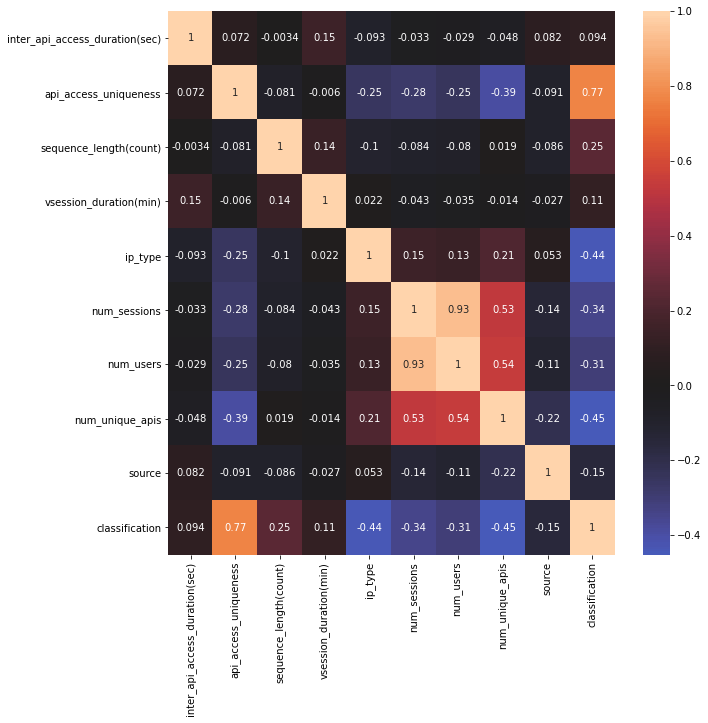

In [36]:
# Transform the non-numeric features in vis_df (ip_type, source, classification)
# to numeric values to plot heatmap visualizing correlation
enc = LabelEncoder()
enc.fit(vis_df.iloc[:,5])
vis_df.iloc[:,5] = enc.transform(vis_df.iloc[:,5])

enc = LabelEncoder()
enc.fit(vis_df.iloc[:,9])
vis_df.iloc[:,9] = enc.transform(vis_df.iloc[:,9])

enc = LabelEncoder()
enc.fit(vis_df.iloc[:,10])
vis_df.iloc[:,10] = enc.transform(vis_df.iloc[:,10])

# plot a correlation heatmap for our features.
# visualize the relationship between features and target
fig = plt.figure(figsize = (10,10))
sns.heatmap(vis_df.corr(), annot=True, center=0)
fig.savefig("./figures/heatmap.png")

In [275]:
# Separate dataframe into feature and data objects
features = df.iloc[0,1:df.shape[1] - 1].reset_index(drop=True)

print("%s features (excluding _id and classification):\n\n%s" %(features.size, features))
data = df.iloc[1:,:]

# Shuffle the rows to ensure random distribution of entities
# Randoms state specified for reproducibility
data = data.sample(frac = 1, random_state = 0).reset_index(drop=True)

9 features (excluding id and classification):

0    inter_api_access_duration(sec)
1             api_access_uniqueness
2            sequence_length(count)
3            vsession_duration(min)
4                           ip_type
5                      num_sessions
6                         num_users
7                   num_unique_apis
8                            source
Name: 0, dtype: object


In [276]:
# Map string values of data to numeric values using LabelEncoder so they can be scaled
# Columns 6 (ip_type), 10 (source), and 11 (classification)

# ip_type ['default', 'datacenter'] -> [1, 0]
# source ['E', 'F'] -> [0, 1]
# classification ['normal', 'outlier'] -> [0, 1]

enc = LabelEncoder()
enc.fit(data[6])
data[6] = enc.transform(data[6])

enc.fit(data[10])
data[10] = enc.transform(data[10])

enc.fit(data[11])
data[11] = enc.transform(data[11])

data.iloc[0:5,:]

,1,2,3,4,5,6,7,8,9,10,11
0,78193506-3ad7-3408-8075-a9634117f101,0.012255196,0.02147806,23.40540541,3184,1,204,185,93,0,0
1,886654dc-3acf-3d11-9da7-2380dbe5b11d,0.004798067,0.012119227,100.0983607,8790,1,342,305,370,0,0
2,6868cceb-fdad-385e-a45e-2af97b162358,0.00080914,0.033794163,13.63350785,127,1,351,191,88,0,0
3,f56f9d87-e1d9-387c-b4c3-862f46bd4be0,2.731596552,0.296551724,290,47530,1,2,1,86,0,1
4,16757b3d-37e8-3a4b-b34c-60af38a5b7b3,0.015351756,0.013678373,19.74452555,4984,1,349,274,74,0,0


In [277]:
# Split data into train and test 
train, test = train_test_split(data, test_size=0.2, random_state = 0)

# Reset indices
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

print("Train (80%%): N = %d" %(train.shape[0]))
print("Test  (20%%): N = %d" %(test.shape[0]))

# Create objects storing IDs of entities
id_train = train.iloc[:,0]
id_test = test.iloc[:,0]

# Separate train/test into predictors (x) and outcome (y)
x_train = train.iloc[:,1:train.shape[1]-1]
x_val = test.iloc[:,1:test.shape[1]-1]
y_train = train.iloc[:,train.shape[1]-1]
y_val = test.iloc[:,test.shape[1]-1]

Train (80%): N = 1359
Test  (20%): N = 340


In [278]:
# Convert all values to float for preprocessing steps
x_train = x_train.astype(float)
x_val = x_val.astype(float)
y_train = y_train.astype(float)
y_val = y_val.astype(float)

# Compute mean and standard deviation on training data
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train,axis = 0)

# center and scale train data 
x_train = preprocessing.scale(x_train)

# center and scale test data 
x_val = x_val - x_train_mean
x_val = x_val/x_train_std

# Save features, IDs, and train/test files
pickle.dump(features,open("./data/features.pkl", "wb"))
pickle.dump(id_train,open("./data/id_train.pkl", "wb"))
pickle.dump(id_train,open("./data/id_test.pkl", "wb"))
pickle.dump(x_train,open("./data/x_train.pkl", "wb"))
pickle.dump(x_val,open("./data/x_val.pkl", "wb"))
pickle.dump(y_train,open("./data/y_train.pkl", "wb"))
pickle.dump(y_val,open("./data/y_val.pkl", "wb"))